# Second Assignment: Risk & Portfolio Management

In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd;
import yfinance

# Step 1. Understand the math behind

Your target: find the most optimized **efficient frontier**.

### Understand efficient frontier

**Efficient Frontier** - The efficient frontier is a concept in portfolio theory that represents **the set of optimal portfolios** offering the <u>highest expected return</u> for a defined level of risk or <u>the lowest risk</u> for a given level of expected return. It is typically visualized as a curve on a risk-return graph, where portfolios below the curve are suboptimal, and those on the curve are considered efficient.

**Example of efficient frontier**

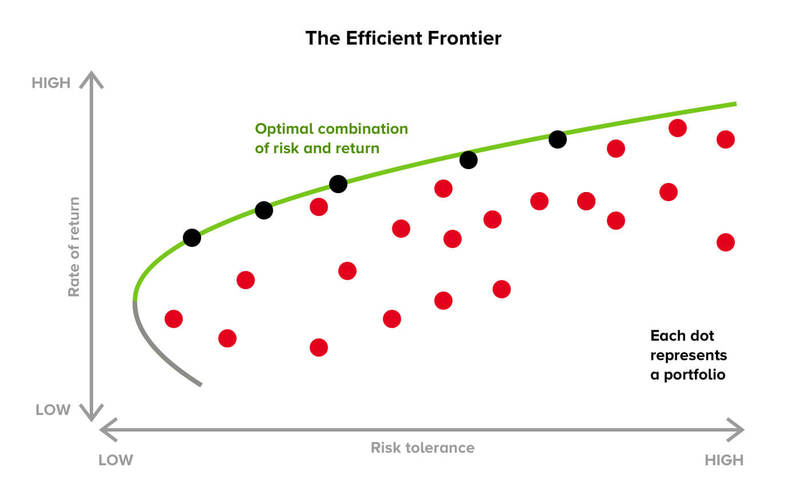

### Understand Sharpe Ratio

**Risk-adjusted return** - amount you earned relatively to the amount of risk made during the period

**Rate return** - percentage of profit or loss on an investment over a specific period of time

**Risk-free rate of return** - theoretical rate of return of an investment with zero risk

**Standard deviation in investing** is a measure of volatility concerning investment returns. It quantifies how much an investment's returns can vary from its average return, indicating the level of risk associated with the investment.

**Sharpe Ratio** - **type of risk-adjusted return**. It is calculated as the difference between the <u>portfolio's return</u> and the <u>risk-free rate</u>, divided by the <u>portfolio's standard deviation (volatility)</u>. 

**A higher Sharpe Ratio indicates better risk-adjusted performance.** The formula is:

$$
Sharpe\ Ratio = \frac{E[R_p] - R_f}{\sigma_p}
$$

Where:
- $E[R_p]$ = Expected portfolio return
- $R_f$ = Risk-free rate
- $\sigma_p$ = Portfolio standard deviation (volatility)



### Connection between Sharpe Ratio and efficient frontier
The Sharpe Ratio is maximized at the point of tangency (touch) between the efficient frontier and the **capital market line (CML)**. This point represents the optimal portfolio, where the risk-return tradeoff is most favorable. By maximizing the Sharpe Ratio, investors can identify the portfolio that provides the best possible return for a given level of risk, aligning with the principles of the efficient frontier.

**The Capital Market Line (CML)** is a graphical representation that shows the relationship between the risks and returns of different portfolios. It links the risk-free rate of return with a portfolio composed of risky assets, illustrating the optimal risk-return combinations for portfolios that include a risk-free asset and a market portfolio.



**CML example**

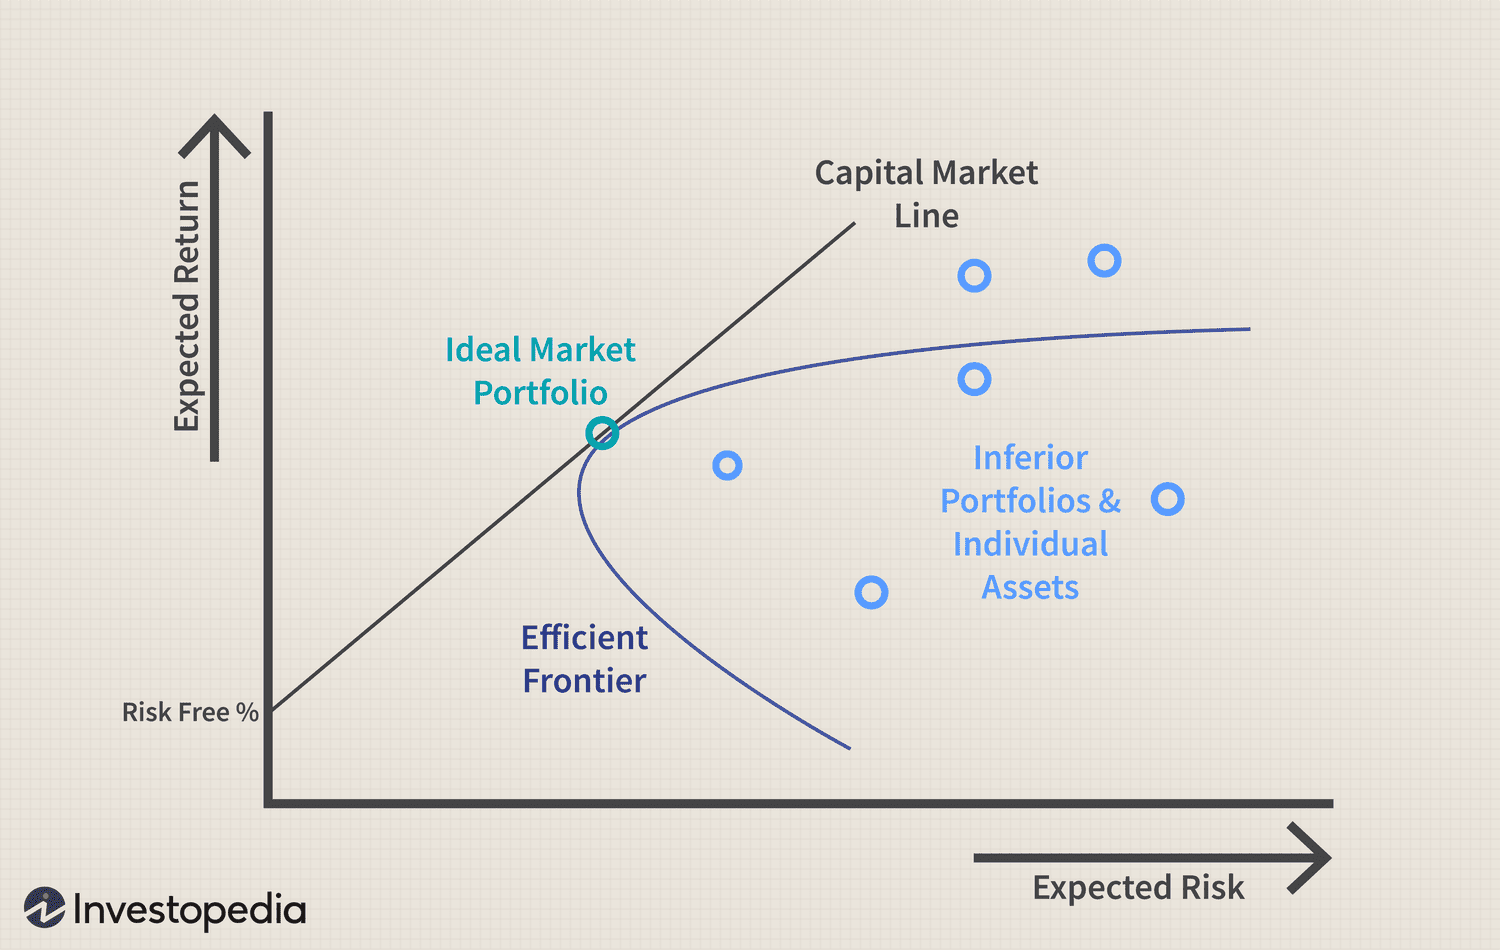

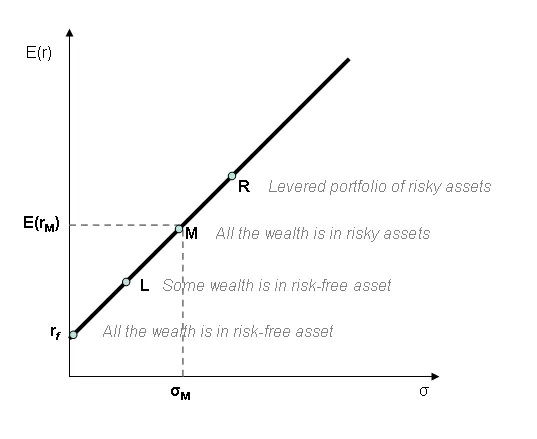

In [ ]:
initial_price = 100;
mu = 0.001;  # daily return (0.1% from 1)
sigma = 0.02;  # daily volatility (2% from 1)
days = 252;  # 1 year
dt = 1 # time stepm

# Step 2. Generate random Gaussian noise for price movements

In [3]:
Z = np.random.normal(0, 1, 1000);  # Gaussian noise

# Step 3. Compute GBM iteratively

In [4]:
prices = np.zeros(days)
prices[0] = initial_price

# Compute GBM iteratively using the formula
for t in range(1, days):
    prices[t] = prices[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[t])

NameError: name 'days' is not defined

# Step 4. Plot efficiency frontier.

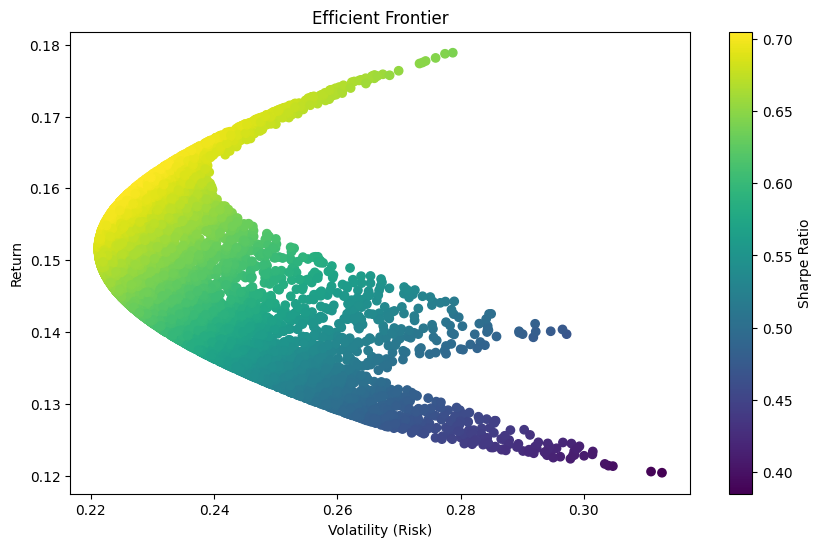

In [ ]:
# Example data: expected returns and covariance matrix
expected_returns = np.array([0.12, 0.18, 0.14])  # Example: 3 assets
cov_matrix = np.array([[0.1, 0.02, 0.04],
                       [0.02, 0.08, 0.03],
                       [0.04, 0.03, 0.09]])

# Generate random portfolio weights
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(expected_returns))
    weights /= np.sum(weights)
    weights_record.append(weights)
    
    # Portfolio return
    portfolio_return = np.dot(weights, expected_returns)
    # Portfolio volatility
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    # Sharpe Ratio (assuming risk-free rate = 0)
    sharpe_ratio = portfolio_return / portfolio_volatility # todo add risk free rate here
    
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = sharpe_ratio

# Extract results
returns, volatilities, sharpe_ratios = results

# how to draw cml

# Plot efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(volatilities, returns, c=sharpe_ratios, cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.show()

# display the best and worst portfiolio and how the stocks are allocated